In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
df = pd.read_csv("Food_Delivery_Times.csv")

In [26]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [27]:
print(df.isnull().sum())

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [28]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())
print(df.isnull().sum())

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


In [29]:
df = df.drop('Order_ID', axis=1)
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


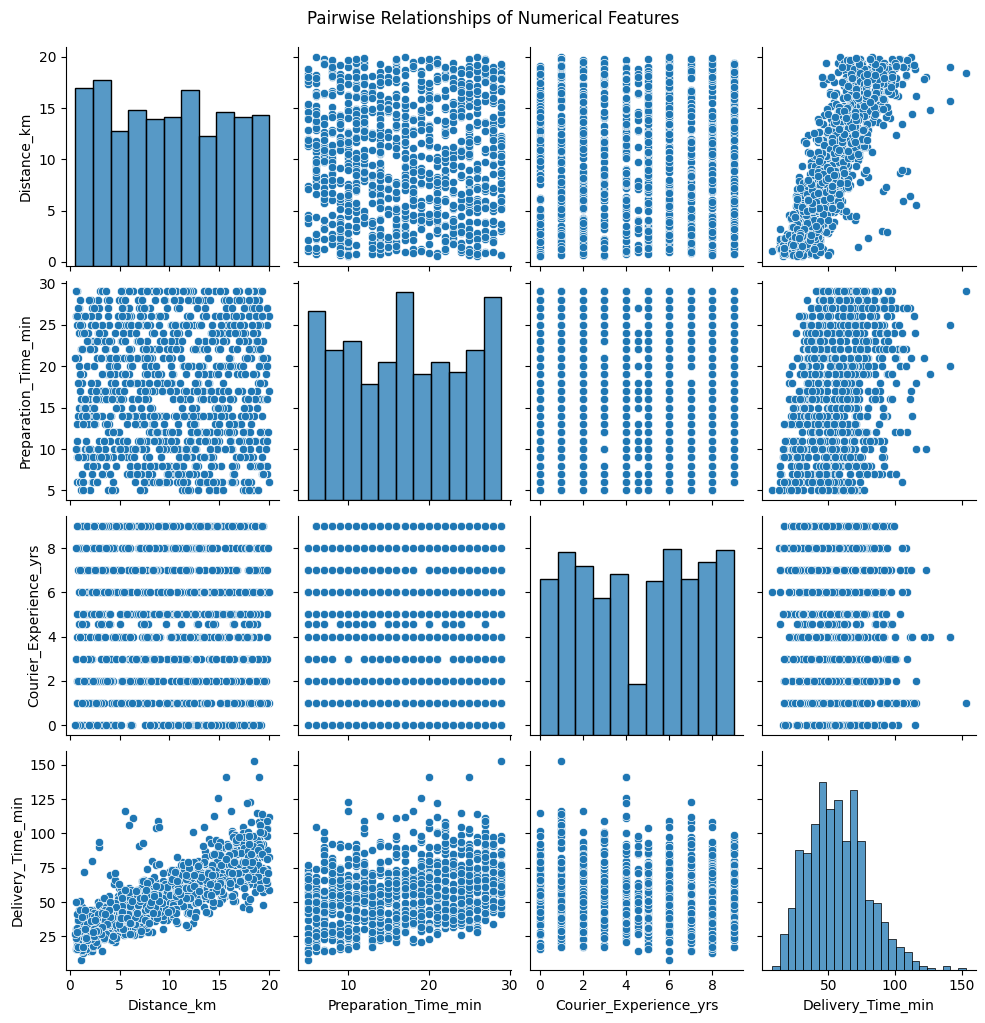

In [34]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()

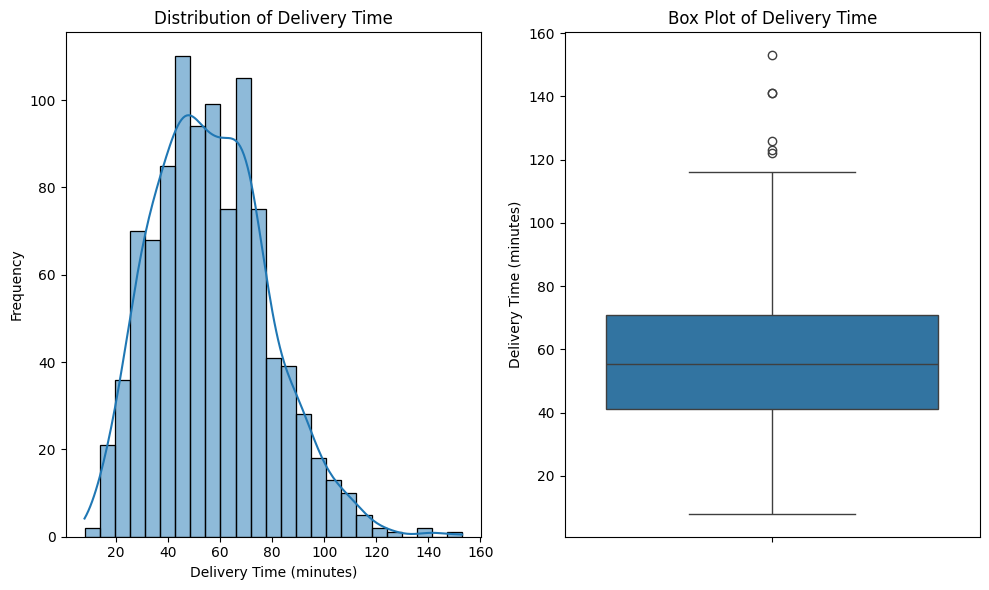

In [36]:
plt.figure(figsize=(10, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Delivery_Time_min'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Delivery_Time_min'])
plt.title('Box Plot of Delivery Time')
plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()

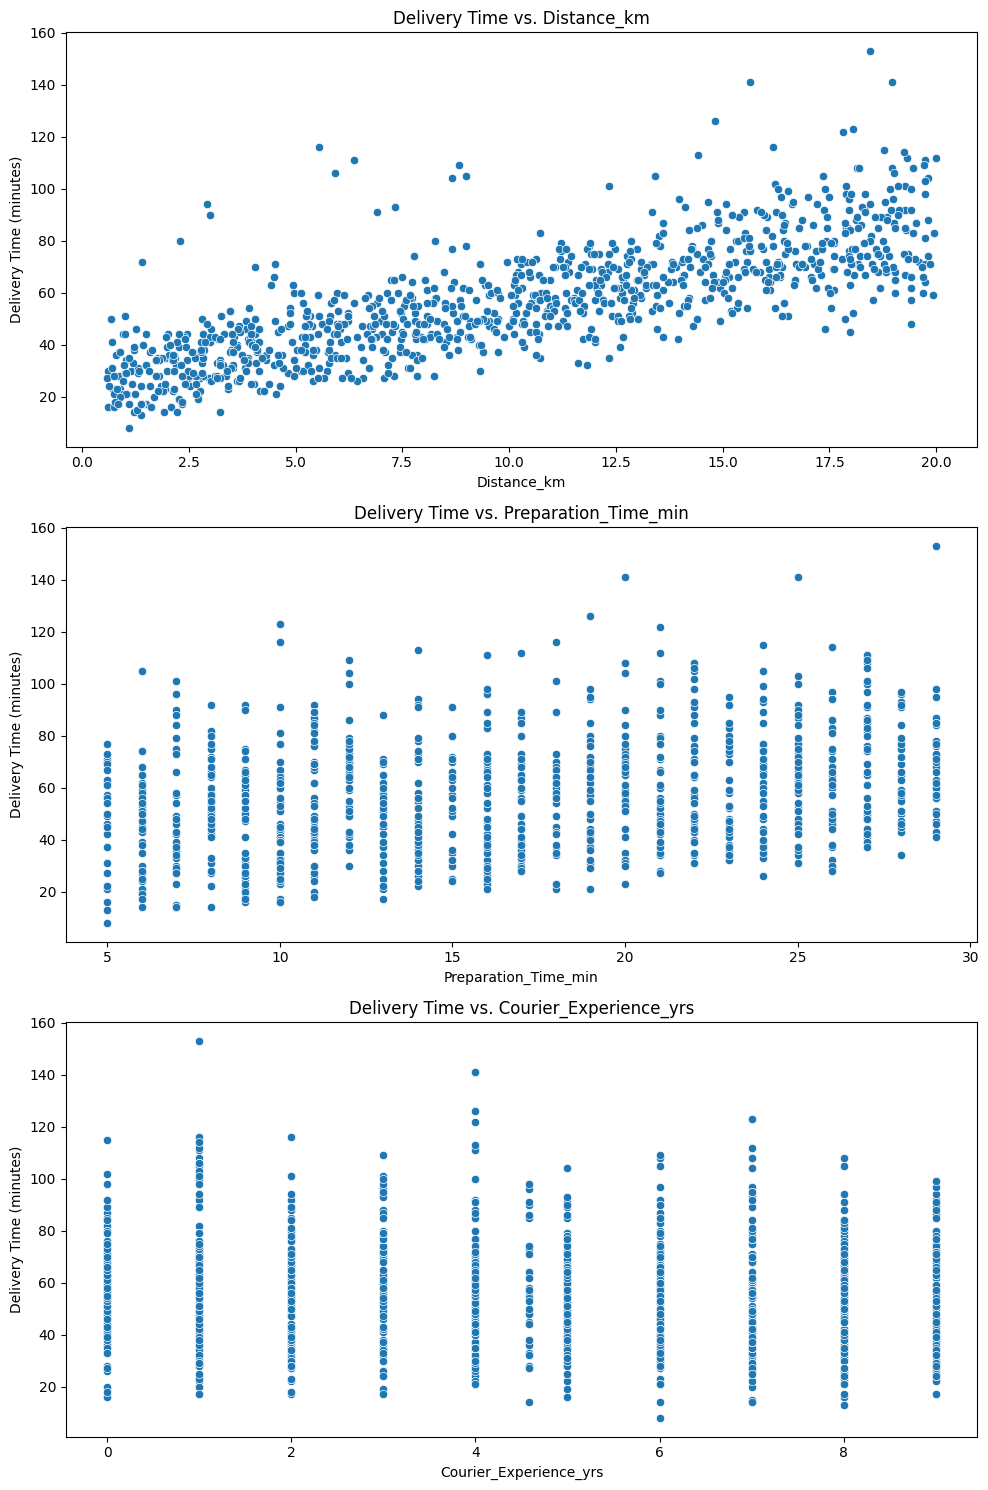

In [35]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Delivery_Time_min')

plt.figure(figsize=(10, 5 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features), 1, i + 1)
    sns.scatterplot(x=df[feature], y=df['Delivery_Time_min'])
    plt.title(f'Delivery Time vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()

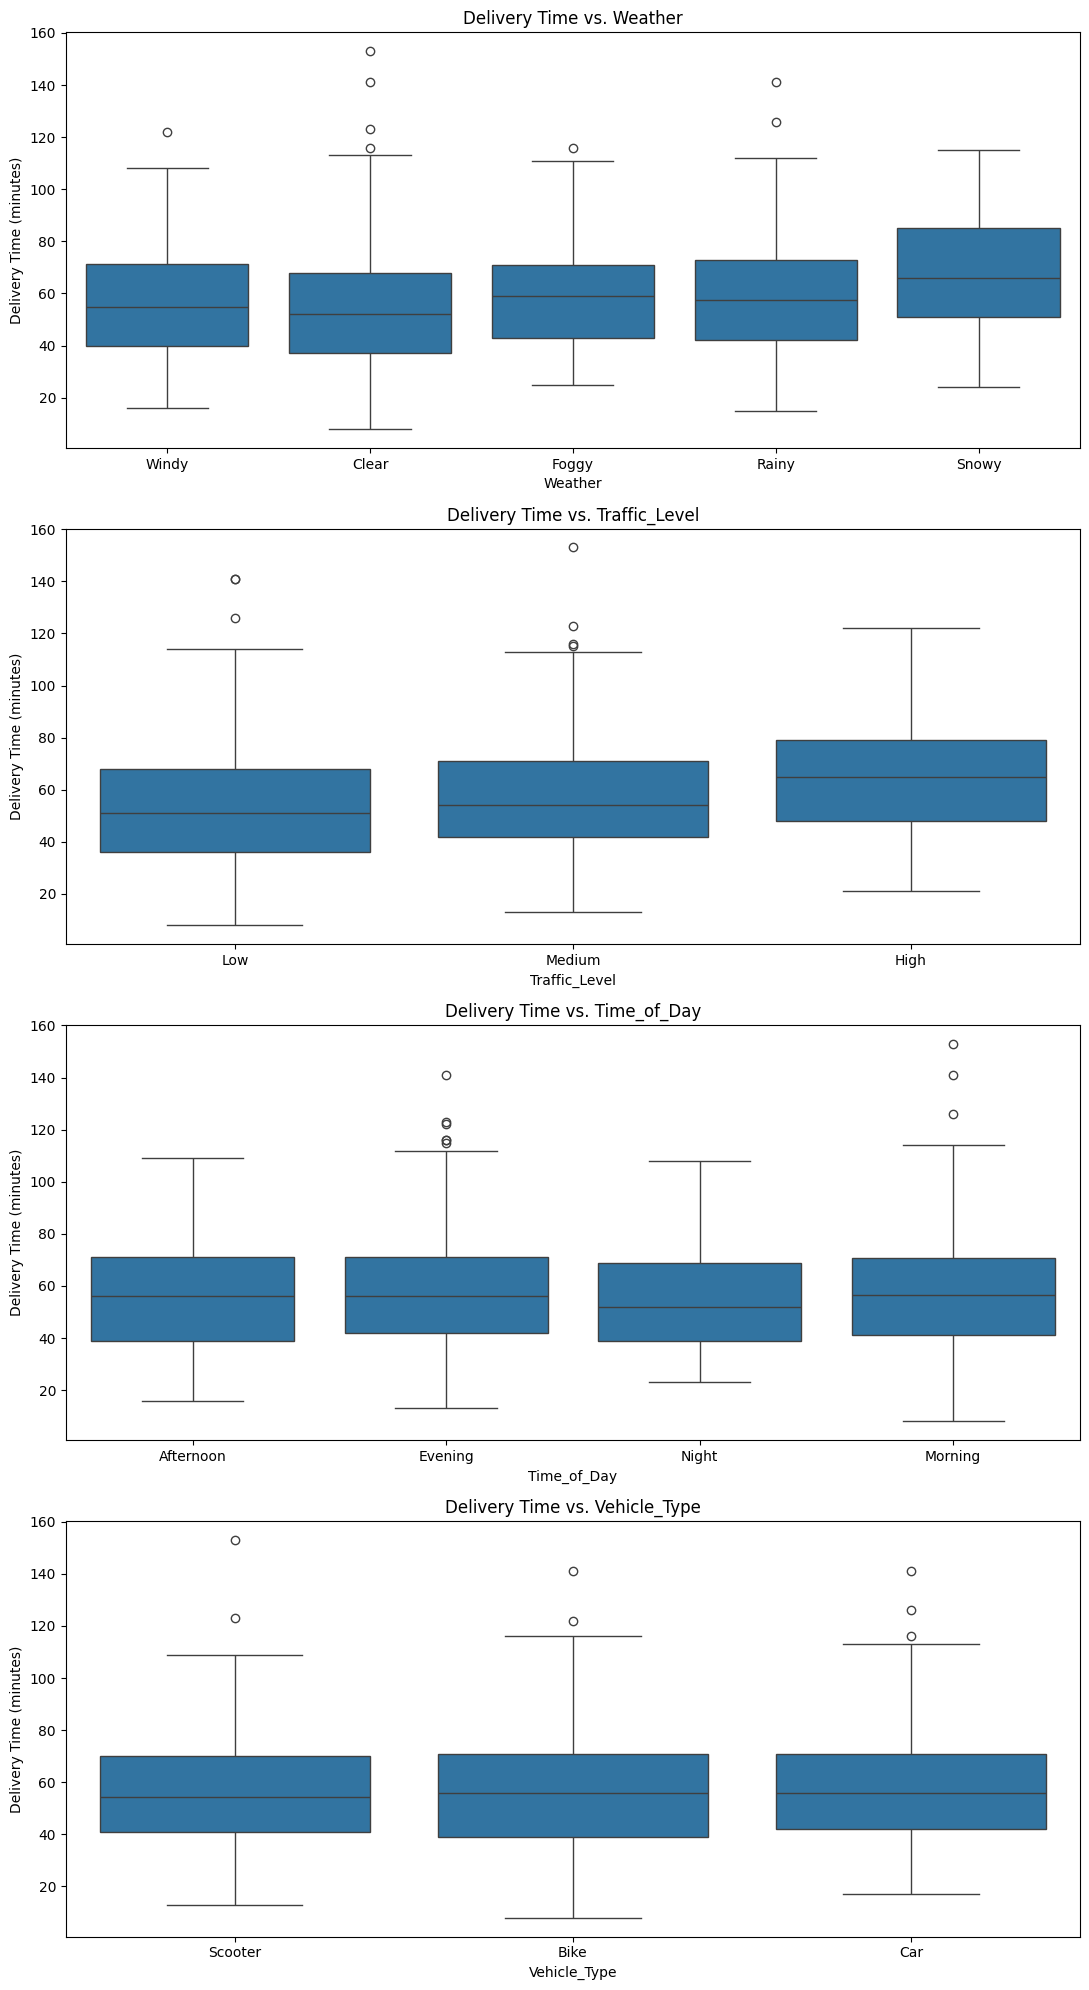

In [37]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

plt.figure(figsize=(11, 5 * len(categorical_features)))

for i, feature in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.boxplot(x=df[feature], y=df['Delivery_Time_min'])
    plt.title(f'Delivery Time vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Delivery Time (minutes)')

plt.tight_layout()
plt.show()

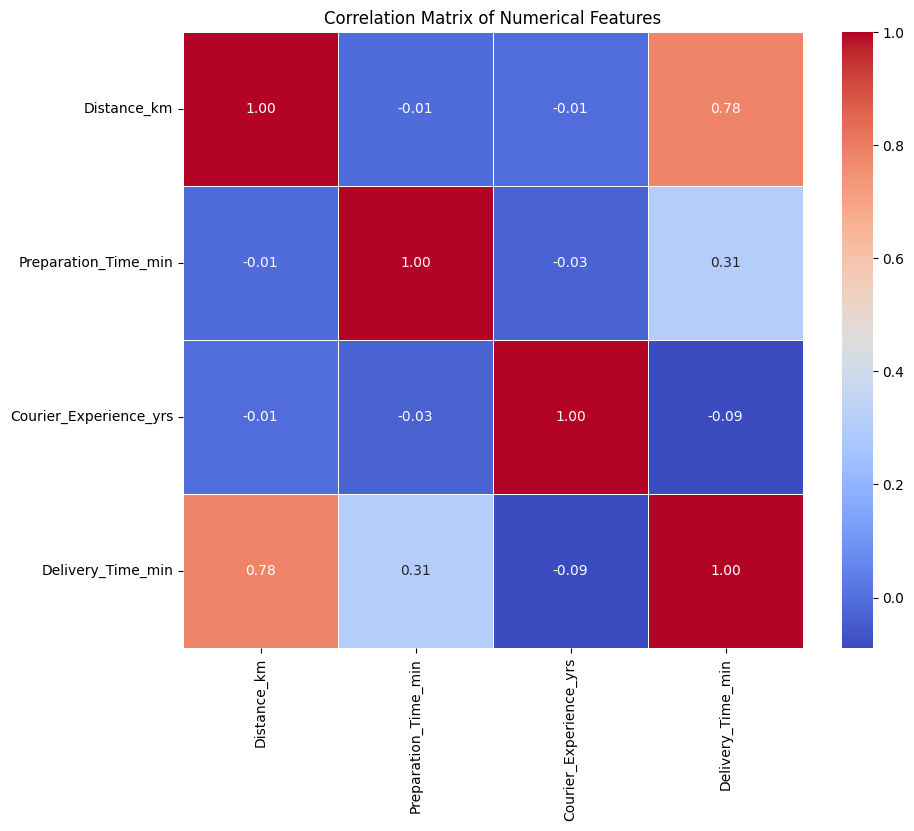

In [33]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()